# SCC-ICMC-USP
# CURSO 2 - CD_AM_MD

### **Profa. Roseli A. F. Romero**
**Objetivo**

A ideia deste notebook é aplicar a função logaritmica para transformar valores
dos dados numa escala mais fácil para se trabalhar.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

# Load the CSV data
file_path = '/Users/matheus/Documents/Projetos/Pessoal/MBA_USP/02 - Ciências de Dados, Aprendizado de Máquina e Mineração de Dados/Aula 5 - Escalonamento Numerico Numerico/california_housing_train.csv'
data = pd.read_csv(file_path).sample(100)

# Extract the relevant columns
rooms = data['total_rooms']
age = data['housing_median_age']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 11183 to 16403
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           100 non-null    float64
 1   latitude            100 non-null    float64
 2   housing_median_age  100 non-null    float64
 3   total_rooms         100 non-null    float64
 4   total_bedrooms      100 non-null    float64
 5   population          100 non-null    float64
 6   households          100 non-null    float64
 7   median_income       100 non-null    float64
 8   median_house_value  100 non-null    float64
dtypes: float64(9)
memory usage: 7.8 KB


In [8]:
print('valor maior de venda',data['median_house_value'].max())

valor maior de venda 500001.0


In [9]:
preco = [float(x) for x in data['median_house_value']]
preco
novo_preco = []
for i in range(0,len(preco)):
  novo_preco.append(math.log(preco[i]))
novo = pd.DataFrame(
    {'Valor antes' :data['median_house_value'],
     'Valor depois':  novo_preco
     }

)
print('Valor transformado pela função log\n', novo)

Valor transformado pela função log
        Valor antes  Valor depois
11183     144300.0     11.879650
1647      107500.0     11.585246
1887       98600.0     11.498827
14734      91400.0     11.423001
9634      112500.0     11.630709
...            ...           ...
6078      156900.0     11.963364
2209      132700.0     11.795846
14746     500001.0     13.122365
15838     458300.0     13.035279
16403     361500.0     12.798017

[100 rows x 2 columns]


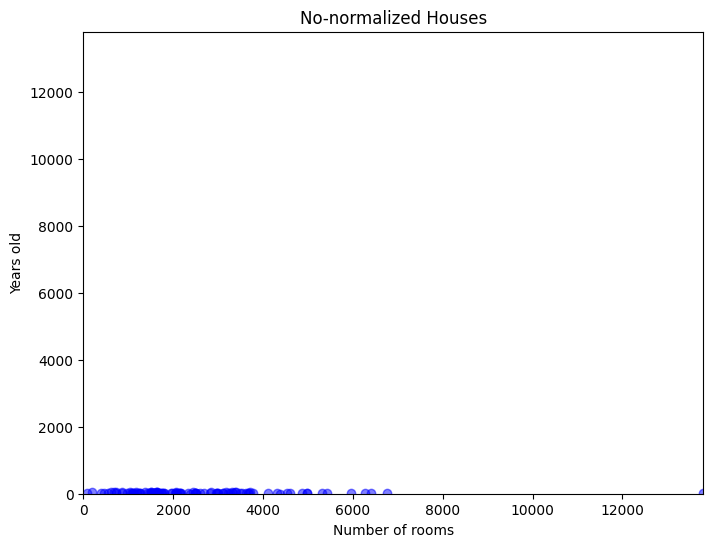

In [10]:
max_limit = max(age.max(), rooms.max())

# Extract the relevant columns
rooms = data['total_rooms']
age = data['housing_median_age']

# Plot without normalization
plt.figure(figsize=(8, 6))  # Adjust the figure size for better appearance
plt.scatter(rooms, age, color='blue', alpha=0.5)
plt.ylabel('Years old')
plt.xlabel('Number of rooms')
plt.title('No-normalized Houses')
plt.ylim(0, max_limit)
plt.xlim(0, max_limit)
plt.show()

In [11]:
# Min-Max Scaling

min_max_scaler = MinMaxScaler()
#

data_min_max_scaled = min_max_scaler.fit_transform(data[['total_rooms', 'housing_median_age']])

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 11183 to 16403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rooms   100 non-null    float64
 1   Age     100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

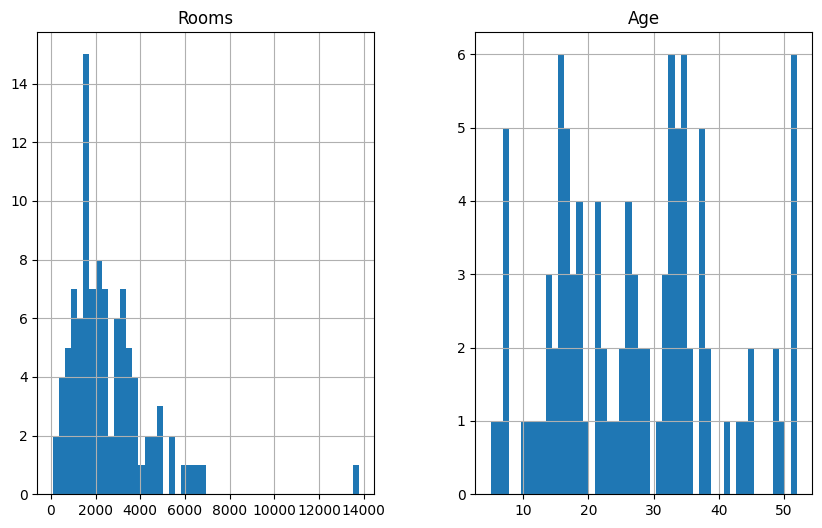

In [12]:
dados = pd.DataFrame.from_dict(
                    {'Rooms': rooms,
                     'Age': age
                    }
                     )
dados.info()
#dados.plot(kind='hist')
dados.hist(bins=50,figsize=[10,6])

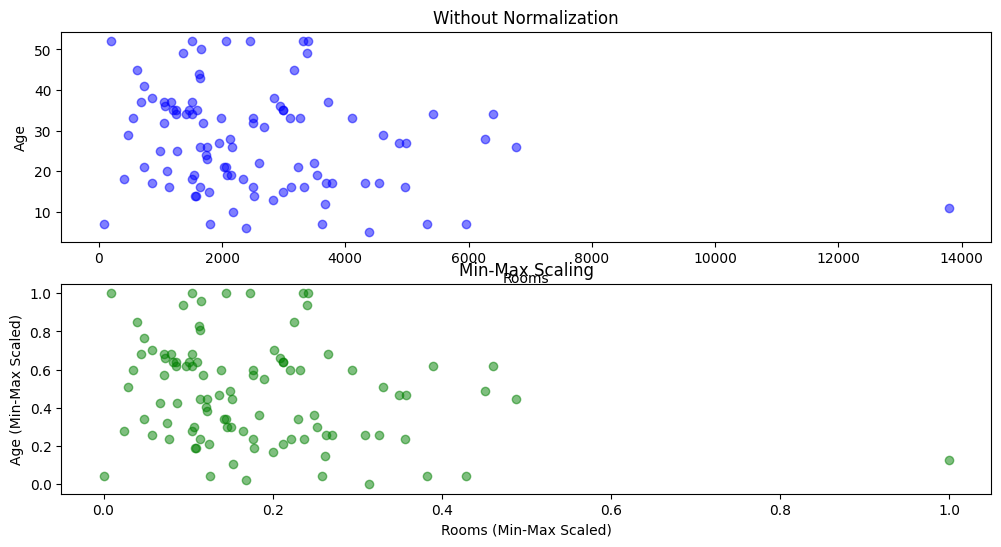

In [13]:
# Plot without normalization
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.scatter(rooms, age, color='blue', alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Age')
plt.title('Without Normalization')

plt.subplot(2, 1, 2)
plt.scatter(data_min_max_scaled[:, 0], data_min_max_scaled[:, 1], color='green', alpha=0.5)
plt.xlabel('Rooms (Min-Max Scaled)')
plt.ylabel('Age (Min-Max Scaled)')
plt.title('Min-Max Scaling')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rooms_n  100 non-null    float64
 1   Age_n    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


array([[<Axes: title={'center': 'Rooms_n'}>,
        <Axes: title={'center': 'Age_n'}>]], dtype=object)

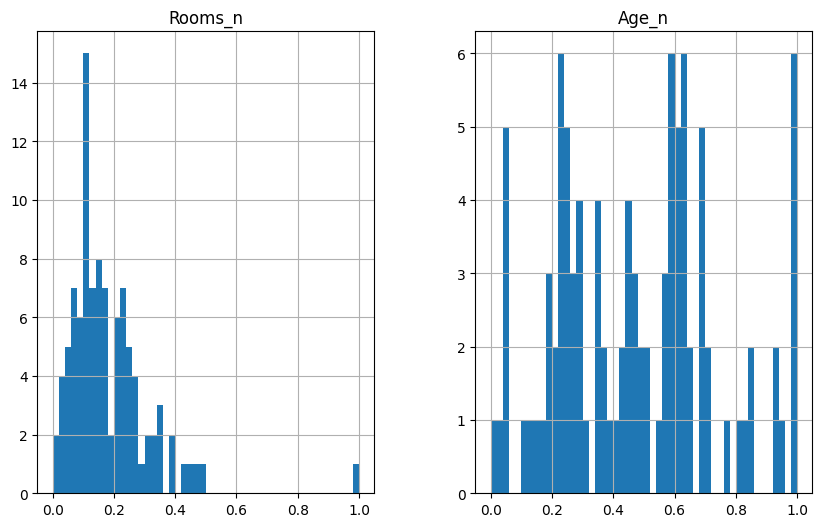

In [14]:
dados = pd.DataFrame.from_dict(
                    {'Rooms_n': data_min_max_scaled[:, 0],
                     'Age_n':  data_min_max_scaled[:, 1]
                    }
                     )
dados.info()
#dados.plot(kind='hist')
dados.hist(bins=50,figsize=[10,6])

In [15]:
# Z-score Normalization
z_scaler = StandardScaler()

data_z_scaled = z_scaler.fit_transform(data[['total_rooms', 'housing_median_age']])

Text(0.5, 1.0, 'Z-score Normalization')

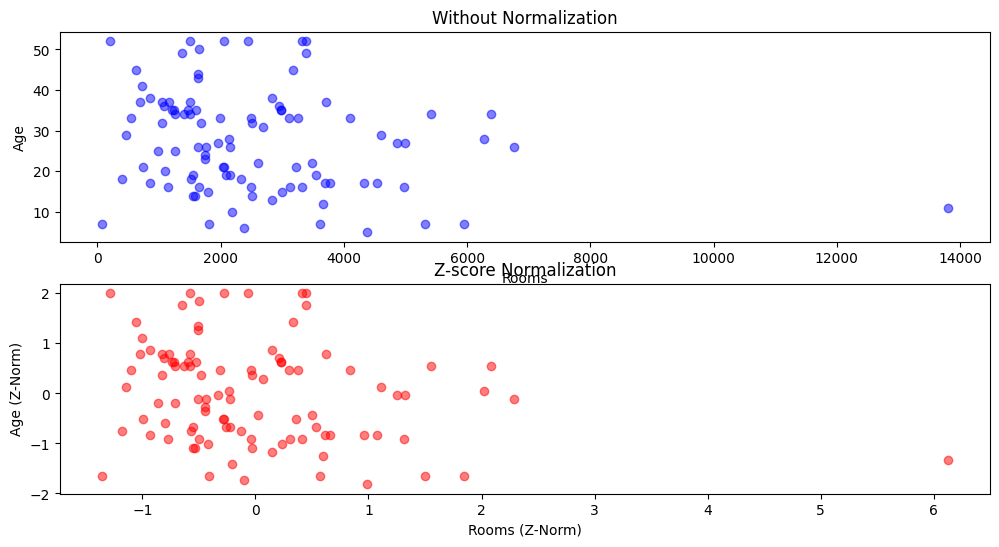

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.scatter(rooms, age, color='blue', alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Age')
plt.title('Without Normalization')

plt.subplot(2, 1, 2)
plt.scatter(data_z_scaled[:, 0], data_z_scaled[:, 1], color='red', alpha=0.5)
plt.xlabel('Rooms (Z-Norm)')
plt.ylabel('Age (Z-Norm)')
plt.title('Z-score Normalization')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rooms_n  100 non-null    float64
 1   Age_n    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


array([[<Axes: title={'center': 'Rooms_n'}>,
        <Axes: title={'center': 'Age_n'}>]], dtype=object)

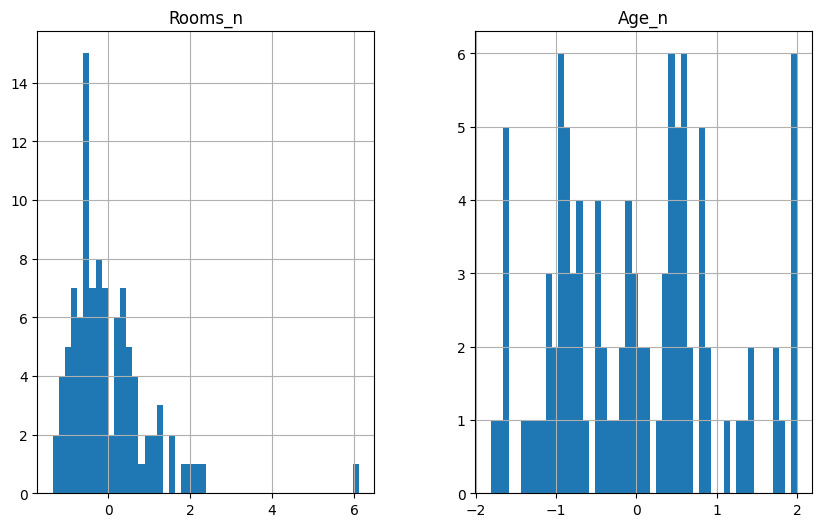

In [17]:
dados = pd.DataFrame.from_dict(
                    {'Rooms_n': data_z_scaled[:, 0],
                     'Age_n':  data_z_scaled[:, 1]
                    }
                     )
dados.info()
#dados.plot(kind='hist')
dados.hist(bins=50,figsize=[10,6])

In [18]:
print("A media do no. de comodos é:",data_z_scaled[:, 0].mean())
print("O desvio-padrão é:",data_z_scaled[:, 0].var() )
print("\n")
print("A media da idade das casas é:",data_z_scaled[:, 1].mean())
print("O desvio-padrão é:",data_z_scaled[:, 1].var() )

A media do no. de comodos é: 5.10702591327572e-17
O desvio-padrão é: 1.0000000000000007


A media da idade das casas é: -9.728329253277934e-17
O desvio-padrão é: 1.0000000000000002


In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

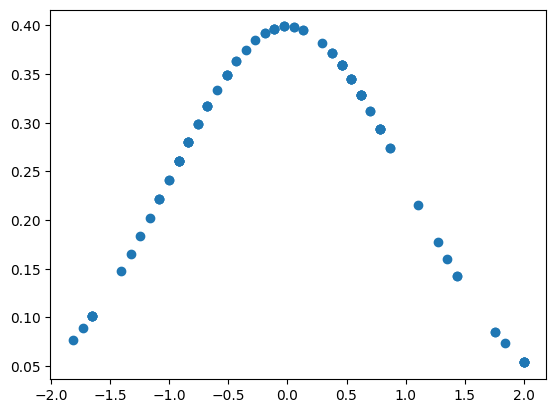

In [20]:
fit = stats.norm.pdf(data_z_scaled[:,1], np.mean(data_z_scaled[:,1]), np.std(data_z_scaled[:,1]))
plt.plot(data_z_scaled[:,1],fit,'o')